# Handwritten Digit Recognization | MNIST Data

A model to recognize and predict handwritten digits using **Tensorflow**, **Keras** and **CNN**.

## MNIST Data
----
The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets.

![Mnist Data](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fanalyticsindiamag.com%2Fwp-content%2Fuploads%2F2017%2F12%2FMNIST-dataset.jpg&f=1&nofb=1)



**Tensorflow**:- 

TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks

**Keras**:-

Keras is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow. It focuses on being user-friendly, modular, and extensible

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist

import os
print(os.listdir("../input"))

%matplotlib inline

['digit-recognizer']


Using TensorFlow backend.


In [2]:
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Label:- it contain the actual number.

# Normalizing our Data
---
In statistics and applications of statistics, normalization can have a range of meanings. In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging.


![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.kdnuggets.com%2Fwp-content%2Fuploads%2Fconvolutional-neural-net-architecture-2.jpg&f=1&nofb=1)

In [4]:
x_train = np.array(df_train.iloc[:,1:])
x_train = np.array([np.reshape(i, (28, 28, 1)) for i in x_train])
y_train = np.array(df_train.iloc[:,0])

In [5]:
x_train = x_train/255.0
y_train = keras.utils.to_categorical(y_train)

In [6]:
x_test = np.array(df_test)
x_test = np.array([np.reshape(i, (28, 28, 1)) for i in x_test])
x_test = x_test/255.0

# Let's Visualize what do we have here.

Sample plots.

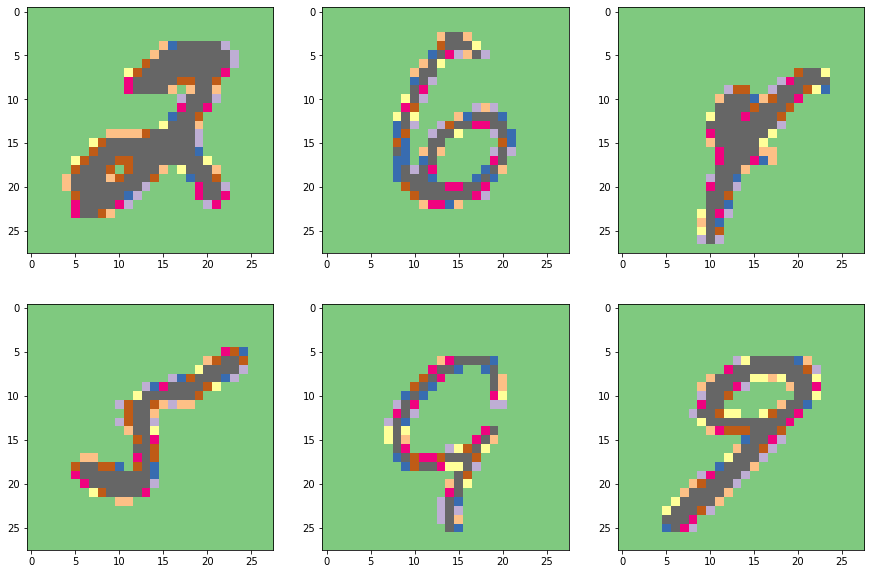

In [7]:
# 6 random plots

img_indices = [random.randint(0,33600) for i in range(6)] 
n=0
fig = plt.figure(figsize=[15,10])
axes = fig.subplots(2, 3)
for row in range(2):
    for col in range(3):
        axes[row,col].imshow((x_train[img_indices[n]]).reshape((28,28)), cmap='Accent')
        n += 1

## Splitting data for training and testing purpose

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

# Lets start with building the model

<img src="https://blog.imarticus.org/wp-content/uploads/2020/04/deep.gif" height=400 width=700>

## Convolutional Neural Networks
___
    In deep learning, a convolutional neural network is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks, based on their shared-weights architecture and translation invariance characteristics.

In [16]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='random_uniform', padding='same', activation='relu', input_shape=(X_train.shape[1:])))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(5,5), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(5,5), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=128, kernel_size=(7,7), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(7,7), kernel_initializer='random_uniform', padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))

model.add(keras.layers.Conv2D(filters=256, kernel_size=(7,7), padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))


model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=y_train.shape[1], activation='softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 128)        

In [17]:
# Configure and train the model
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train,  batch_size=500, epochs=100, validation_data=(X_test,Y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 4s 118us/step - loss: 0.5698 - accuracy: 0.8046 - val_loss: 1.3211 - val_accuracy: 0.9040
Epoch 2/100
33600/33600 [==============================] - 3s 92us/step - loss: 0.0770 - accuracy: 0.9778 - val_loss: 0.9258 - val_accuracy: 0.9818
Epoch 3/100
33600/33600 [==============================] - 3s 92us/step - loss: 0.0479 - accuracy: 0.9859 - val_loss: 0.4764 - val_accuracy: 0.9820
Epoch 4/100
33600/33600 [==============================] - 3s 100us/step - loss: 0.0362 - accuracy: 0.9898 - val_loss: 0.2211 - val_accuracy: 0.9854
Epoch 5/100
33600/33600 [==============================] - 3s 93us/step - loss: 0.0323 - accuracy: 0.9909 - val_loss: 0.0632 - val_accuracy: 0.9880
Epoch 6/100
33600/33600 [==============================] - 3s 96us/step - loss: 0.0219 - accuracy: 0.9937 - val_loss: 0.0363 - val_accuracy: 0.9899
Epoch 7/100
33600/33600 [==============================] - 3s

Epoch 55/100
33600/33600 [==============================] - 3s 93us/step - loss: 3.5994e-06 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9949
Epoch 56/100
33600/33600 [==============================] - 3s 95us/step - loss: 3.5554e-06 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9948
Epoch 57/100
33600/33600 [==============================] - 3s 93us/step - loss: 4.0512e-06 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9948
Epoch 58/100
33600/33600 [==============================] - 3s 93us/step - loss: 3.1287e-06 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9949
Epoch 59/100
33600/33600 [==============================] - 3s 94us/step - loss: 5.8136e-06 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9948
Epoch 60/100
33600/33600 [==============================] - 3s 95us/step - loss: 8.8291e-06 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9944
Epoch 61/100
33600/33600 [==============================] - 3s 97us/step - loss: 2

# Predicted Number Vs Actual Number

Lets plot and see how well is our model's prediction.

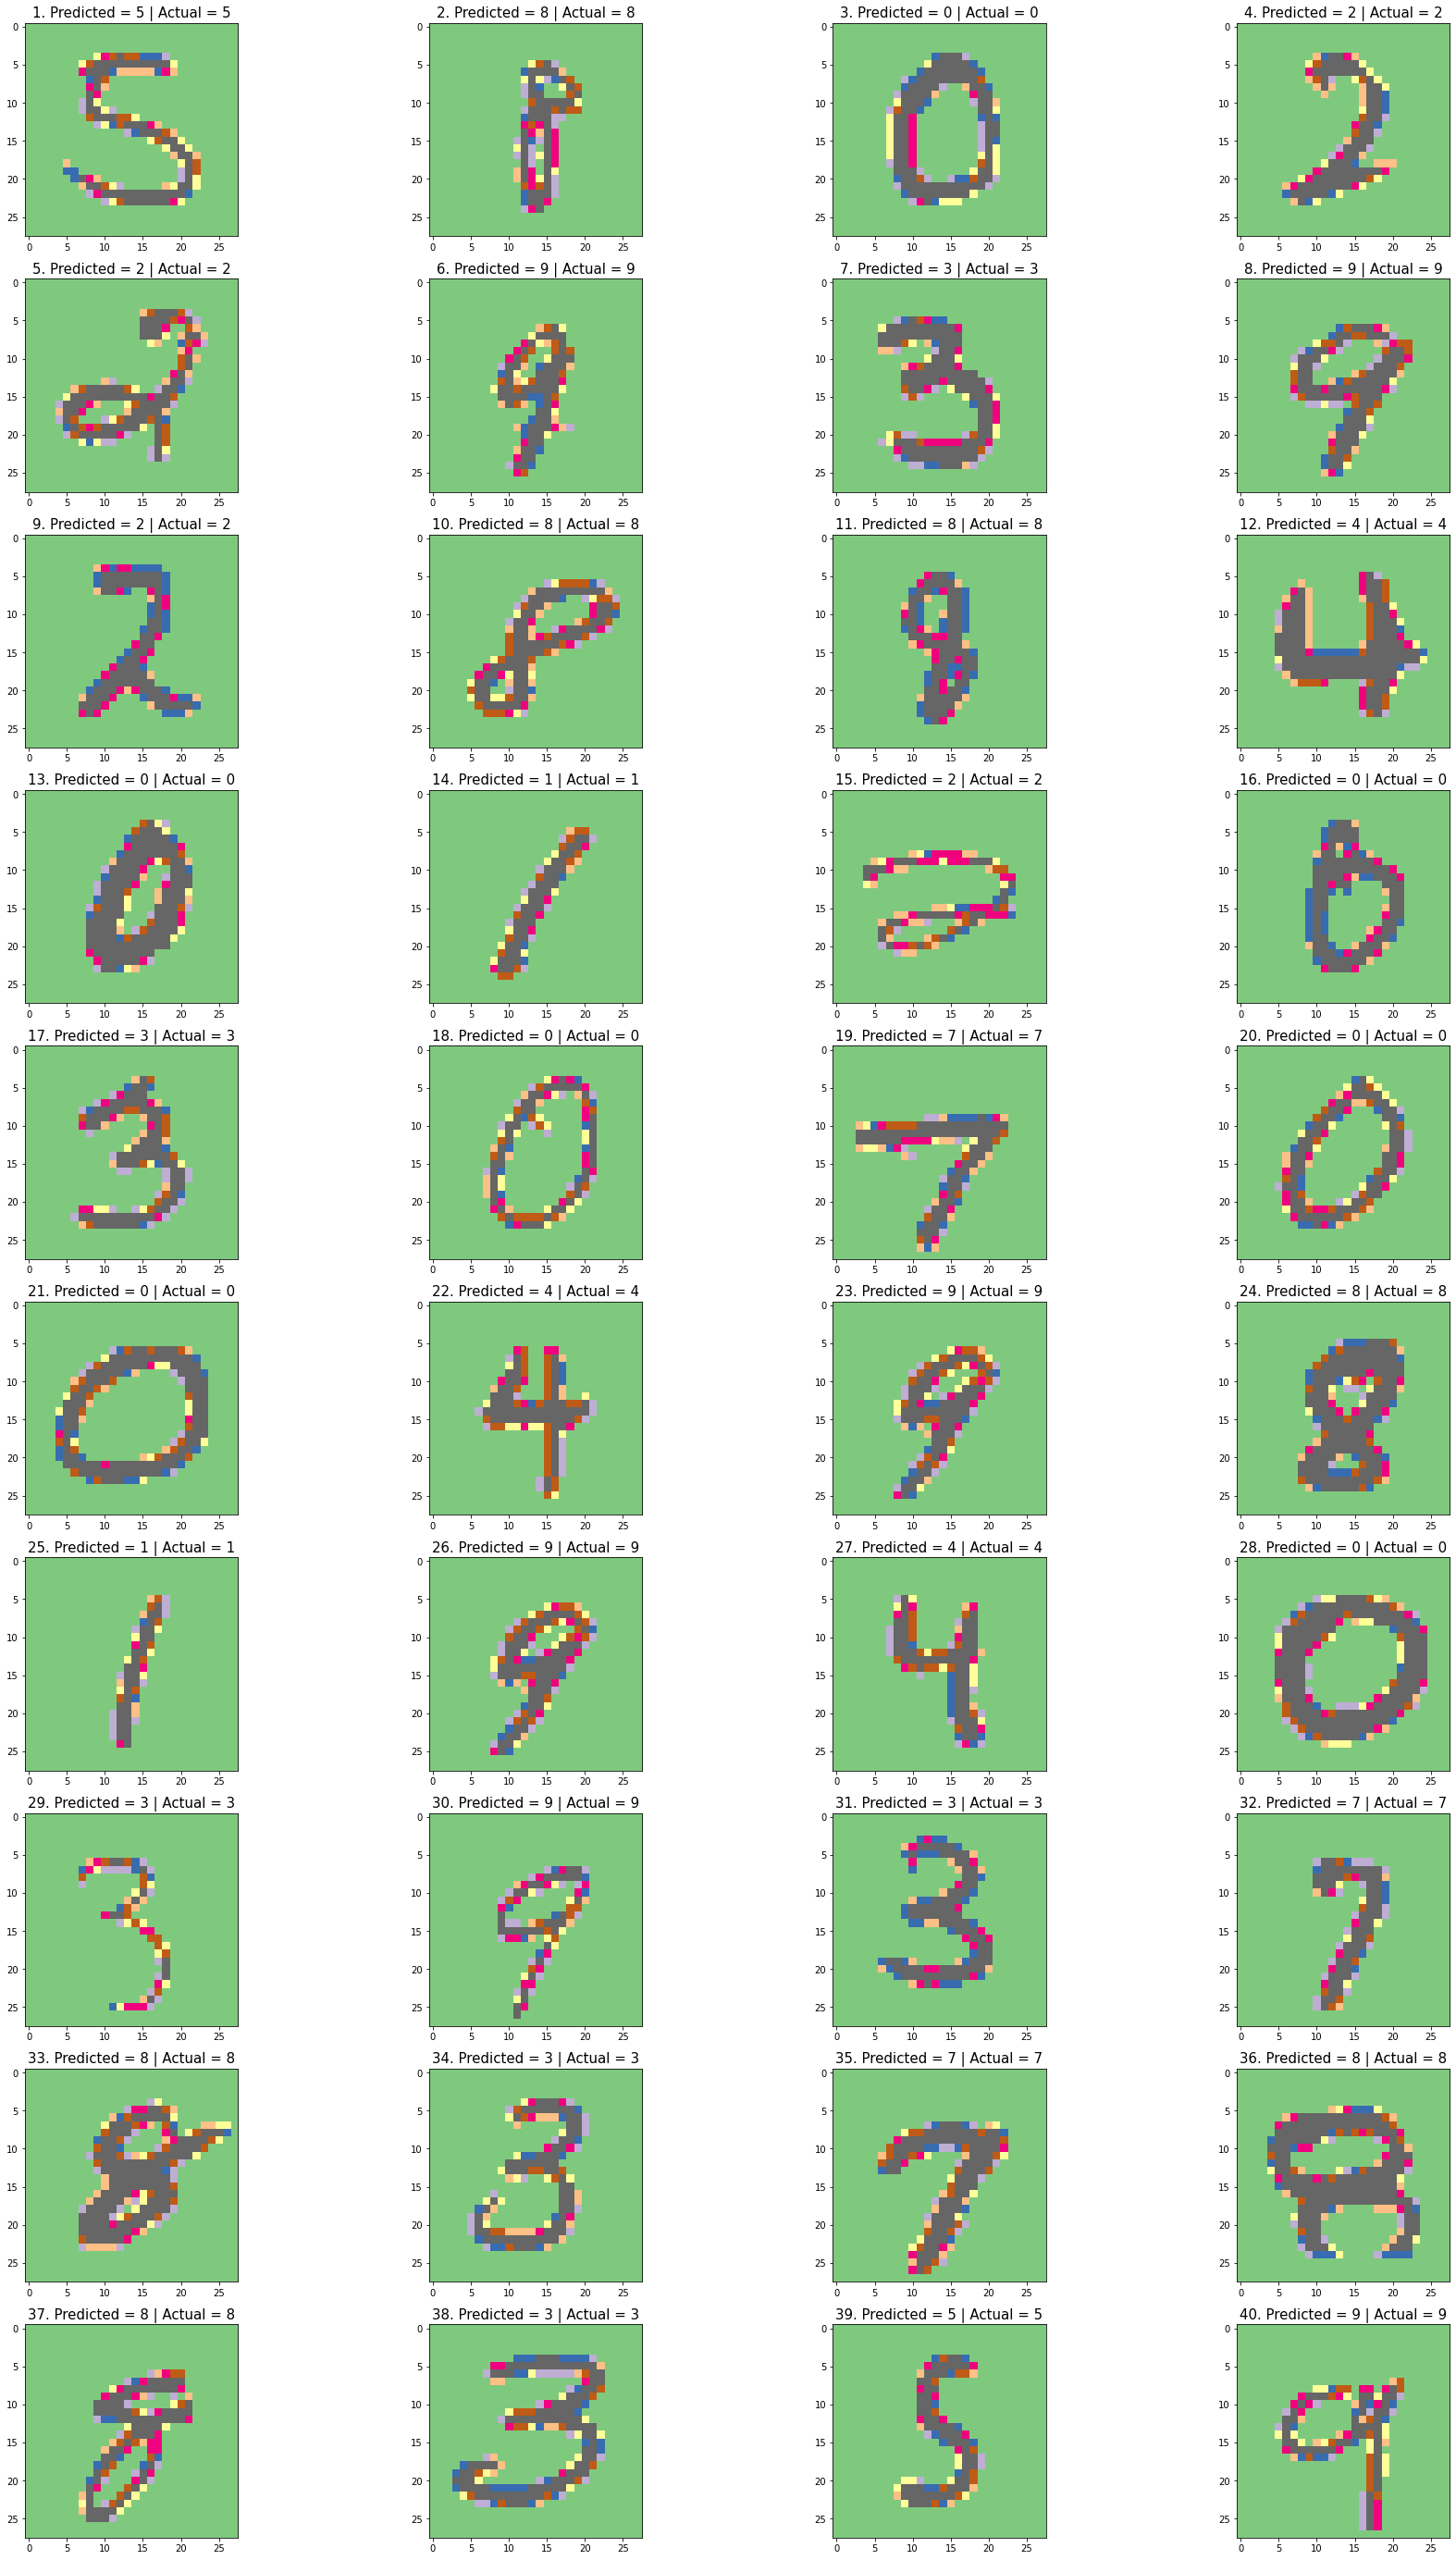

In [18]:
# 40 random plots to test our model

img_indices = [random.randint(0,1000) for i in range(40)]
n=0
fig = plt.figure(figsize=[30,50])
axes = fig.subplots(10, 4)
for row in range(10):
    for col in range(4):
        axes[row,col].imshow((X_test[img_indices[n]][:,:,0]).reshape((28,28)), cmap='Accent')
        predicted_num = np.argmax(model.predict(X_test[img_indices[n]:img_indices[n]+1]))
        actual_num = np.argmax(Y_test[img_indices[n]])
        axes[row,col].set_title("{}. Predicted = {} | Actual = {}".format(n+1, predicted_num, actual_num), fontsize=15)
        n += 1

# Let's Save and submit what we made.

* Saving out predictions to `submission.csv`

In [19]:
id_img = []
label = []
for i in range(len(x_test)):
    id_img.append(i+1)
    label.append(np.argmax(model.predict(x_test[i:i+1])))
    
img_id = np.array(id_img)
label = np.array(label)

In [20]:
op_df = pd.DataFrame()
op_df['ImageId'] = img_id
op_df['Label'] = label
op_df.to_csv("submission.csv", index=False)

# Request: - 
If you find this kernel interesting and learns something from it please don't forget to upvote. Also, write your question in comments below lets start the discussion.
![](https://nelottery.com/media/email_alerts/2019/12_19/research/thankyou.gif)